# Catch crop diversity increases rhizosphere carbon input and soil microbial biomass

Norman Gentsch, Jens Boy, Juan Daniel Kennedy Batalla, Diana Heuermann, Nicolaus von Wirén, Dörte Schweneker, Ulf Feuerstein, Jonas Groß, Bernahrd Bauer, Barbara Reinhold-Hurek, Thomas Hurek, Fabricio Camacho Céspedes, Georg Guggenberger

Published: 2020-05-23

## Abstract
## Introduction
## Material and methods
## Results
## PLANT BIOMASS AND NET ECOSYSTEM EXCHANGE
The NEE decreased significantly with increasing catch crop diversity (Fig. 1), suggesting increasing $CO_2$-C uptake from the atmosphere.


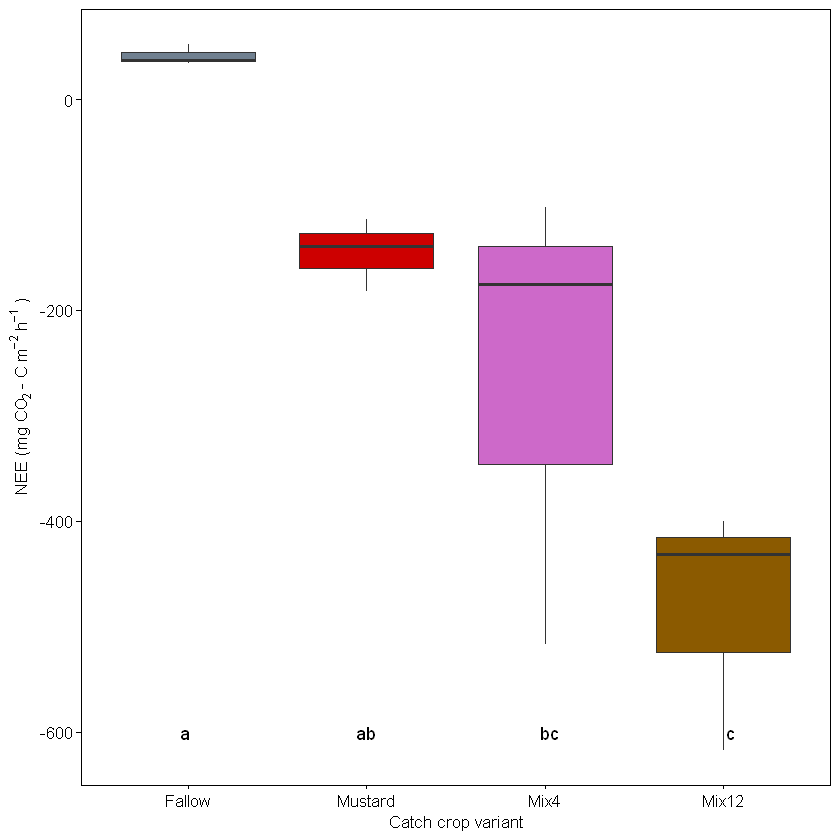

In [3]:
# written with R version 4.0.2 (2020-06-22) -- "Taking Off Again"
##------ Tue Oct 13 11:53:48 2020 ------##
# by Norman Gentsch

library(tidyverse)
library(lme4)
library(emmeans)
library(multcomp)

# set theme for ggplot
theme_set(theme_bw())
theme_myBW <- theme(axis.title.x = element_text(size = 10, color = "black"), 
                    axis.title.y = element_text(angle = 90, vjust = 1.5, size = 10, color = "black"),
                    axis.text.x = element_text(size = 10, color = "black"), 
                    axis.text.y = element_text(size = 10, color = "black"), 
                    axis.ticks =element_line(colour="black"),
                    strip.text.x = element_text(size = 10, color = "black"),
                    strip.background = element_blank(),
                    panel.border =element_rect(colour="black", fill=NA), 
                    panel.grid.major = element_blank(),
                    panel.grid.minor = element_blank(),
                    plot.title = element_text(size = 12, hjust=0.5),
                    #legend.position=c(0.0,1.0), 
                    #legend.justification=c(0,1), 
                    legend.text = element_text(size = 10),
                    legend.text.align=0,
                    legend.title =  element_text(size = 10), 
                    legend.key = element_rect(colour="white", fill = "white"),
                    legend.key.size = unit(5, "mm"),
                    legend.background = element_blank())


# set vector with colors and label
COL <- c("Fallow" = "slategray", "Mustard" = "red3" , "Mix4" = "orchid3", "Mix12"= "orange4")
SHP <- c("Fallow"=21,"Mustard"=22,"Mix4"=23, "Mix12"=24)


# generate data frame with original data
data <- data.frame(cc_variant = structure(c(1L, 1L, 1L, 3L, 4L, 2L, 3L, 4L, 2L, 2L, 4L, 3L), .Label = c("Fallow", "Mustard", "Mix4", "Mix12"), class = "factor"),
                   Date = structure(c(17092, 17093, 17098, 17092, 17092, 17092, 17093, 17093, 17093, 17098, 17098, 17098), class = "Date"),
                   NEE = c(52.3186092, 36.752742, 34.590816, -516.868370737168, -617.110003978854, -182.24567563611, -102.63776100067, -431.558870280712, -139.041211720174, -114.099387563412, -400.212603947375, -175.332083704246)
)


lm_NEE <- lmer(NEE ~ cc_variant + (1|Date), data=data)
df_NEE <- cld(emmeans(lm_NEE, specs ="cc_variant"), Letters=letters, sort=FALSE)

# summary table for 
sum.lm <- glht(lm_NEE, linfct = mcp(cc_variant = "Tukey"))
#summary(sum.lm)$test$pvalue


glht.table <- function(x) {
  pq <- summary(x)$test
  mtests <- cbind(pq$coefficients, pq$sigma, pq$tstat, pq$pvalues)
  colnames(mtests) <- c("Estimate", "Std Error", "z value", "p value")
  return(mtests)
  }

df.summary <- data.frame(glht.table(sum.lm))
#df.summary

abc <- subset (df.summary, p.value<0.01)
maxValue <- max(abc$p.value)
p <- round(maxValue + 5*10^(-3), 2)



# Plot for BFS
ggplot(data, aes(x= cc_variant, y=NEE, fill= cc_variant))+
  geom_boxplot()+
  scale_fill_manual(values = COL, guide=FALSE)+
  geom_text(data= df_NEE ,aes(y=-600,x=cc_variant, label=.group))+
  labs(x="Catch crop variant",  y=expression("NEE (mg CO"[2]~"- C"~m^{-2}~h^{-1}~")"), fill="")+
  theme_myBW

ggsave("Fig1.png", width = 84, height = 70, units = "mm", dpi = 600)



#summary(lm_NEE)


Net ecosystem exchange (NEE) of C between catch crop treatments. Bars represent means ± SE; lowercase letters denote significant differences (*p*  <  {glue:}`p`) between treatments

## Discussion
### NEE IS LINKED TO PLANT DIVERSITY
... The NEE in our study showed a remarkably strong negative gradient from mustard to mix 4 to mix 12 (Fig. 1), which suggested higher photosynthetic 
$CO_2$-C fixation rates with increasing catch crop diversity.

## Conclusion
## References